In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
db = pd.read_csv("https://data.alexmattyou.repl.co/db/simpillearn-demo/Lesson-7/driver-data.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
db.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
db = db.drop('id',axis=1)
db.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


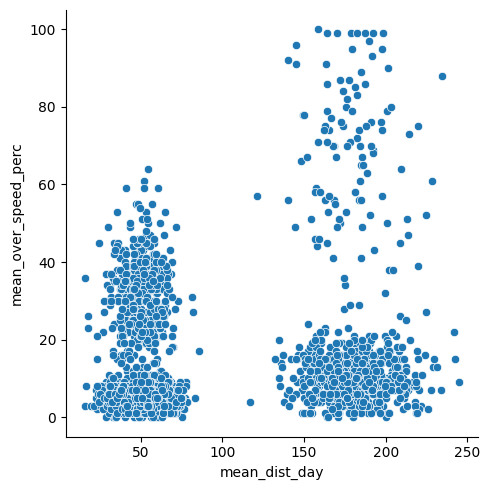

In [12]:
sns.relplot(x=db['mean_dist_day'], y=db['mean_over_speed_perc'], data=db)

In [15]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=4)
alg.fit(db)

KMeans(n_clusters=4)

In [21]:
alg.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

In [45]:
alg.labels_

array([3, 3, 3, ..., 1, 1, 1])

In [46]:
pd.DataFrame(alg.labels_).value_counts()

0    2775
1     696
3     425
2     104
dtype: int64

In [49]:
db['cluster'] = alg.labels_
db.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3


c:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


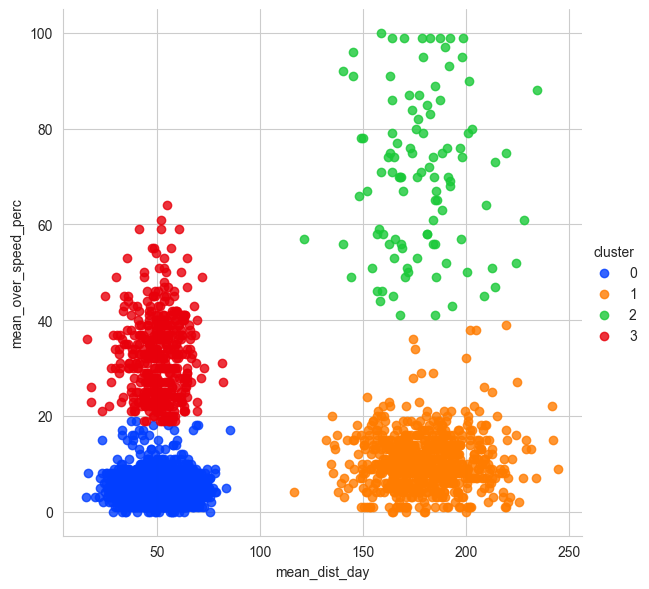

In [55]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=db,hue='cluster',palette='bright',size=6,aspect=1,fit_reg=0)